# Problem 1 Solution

In [128]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [129]:
import gensim.downloader as api

model = api.load('word2vec-google-news-300')

In [130]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [131]:
stop_words = set(stopwords.words('english'))
print(stop_words)
if "n't" not in stop_words:
  print("true")

{'how', 'it', "you've", "hasn't", 'my', 'theirs', "we've", "they'd", 'a', 'just', 'yourselves', 'doing', 'i', 'and', 'being', "hadn't", 'you', 'll', 'wouldn', 'your', 'same', 'at', 'into', "won't", "they'll", 'be', "he's", 'had', 'what', 've', "i'm", 'yourself', "aren't", 'herself', 'have', 'who', 'very', 'not', 'by', 'through', 'about', 'aren', "wasn't", 'again', 'wasn', 'itself', 'is', 'where', 'below', 'no', "she'll", 'an', 'few', 'mightn', 'most', 'ma', 'whom', 'if', "he'd", 'should', 'or', "needn't", 'did', 'why', "i'll", "should've", 'this', 'myself', 'of', 'on', 't', 'that', 'does', 'so', "you'll", 'o', "you'd", 'having', 'more', "that'll", 'will', 'ourselves', 'only', 'all', 'as', 'further', 'up', 'y', 'hasn', "we're", 'won', 'the', 'can', 'him', 'she', 'was', 'any', 'against', 'too', 'with', "couldn't", 're', 'doesn', 'hadn', 'his', 'its', "mightn't", 'yours', 'to', 'here', "weren't", 'don', 'me', "she's", 'are', 'each', 'but', 'in', 'we', 'weren', 'over', 'other', "haven't", 

In [132]:
df= pd.read_csv("C:/Users/hp/Downloads/spam.csv", encoding = "latin-1")
df.head()
df.rename(columns = {'v1':'label','v2':'text'},inplace=True)
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()
df["label"] = df["label"].map(  {"ham":0,"spam":1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [133]:
def remove_stop_words(token):
  return [word.lower() for word in token if word.lower() not in stop_words]

# Only tokenize if not already tokenized
df.iloc[:, 1] = df.iloc[:, 1].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)
print("dataframe without removing stopping words :\n",df.head())
df.iloc[:, 1] = df.iloc[:, 1].apply(lambda x: remove_stop_words(x) if isinstance(x, list) else x)

print("df after stop_words are removed: \n", df.head())


print(df.iloc[3, 1])

dataframe without removing stopping words :
    label                                               text
0      0  [Go, until, jurong, point, ,, crazy, .., Avail...
1      0           [Ok, lar, ..., Joking, wif, u, oni, ...]
2      1  [Free, entry, in, 2, a, wkly, comp, to, win, F...
3      0  [U, dun, say, so, early, hor, ..., U, c, alrea...
4      0  [Nah, I, do, n't, think, he, goes, to, usf, ,,...
df after stop_words are removed: 
    label                                               text
0      0  [go, jurong, point, ,, crazy, .., available, b...
1      0           [ok, lar, ..., joking, wif, u, oni, ...]
2      1  [free, entry, 2, wkly, comp, win, fa, cup, fin...
3      0  [u, dun, say, early, hor, ..., u, c, already, ...
4      0  [nah, n't, think, goes, usf, ,, lives, around,...
['u', 'dun', 'say', 'early', 'hor', '...', 'u', 'c', 'already', 'say', '...']


In [134]:
def vector_text(model, tokens):
  vectors = [model[word].reshape(1,-1) for word in tokens if word in model]
  if vectors:
    return np.mean(vectors, axis = 0)
  else:
    return np.zeros(300)

In [135]:
df['vector'] = df.iloc[:, 1].apply(lambda x: vector_text(model, x) if isinstance(x, list) else np.zeros(300))

print("Shape of vector for row 0:", df['vector'][0].shape)
print(df['vector'][0])

Shape of vector for row 0: (1, 300)
[[-0.01980591  0.05167062  0.02709961  0.21868025 -0.0310342   0.03897967
   0.08196586 -0.09603446  0.01432146  0.07736329 -0.06193366 -0.1637486
  -0.02575248 -0.0471889  -0.10367257  0.14072964  0.15539551  0.09352984
   0.03390067 -0.02132089 -0.0716391  -0.01377705  0.09657506  0.03925433
  -0.01184082  0.0204869  -0.12768555  0.02552141  0.0472363  -0.04317801
  -0.05688912  0.02345221 -0.05597796 -0.01293073 -0.01777867 -0.04088129
  -0.02099078 -0.02489035  0.02235821  0.03364781  0.03664725 -0.09109061
   0.13033621  0.05961827  0.02466256 -0.08101545 -0.09543718 -0.05844443
   0.01415144  0.10117885 -0.0839059   0.15156338 -0.02831377  0.01769148
  -0.05941882  0.08585031 -0.09414673 -0.1260376   0.04568917 -0.09597342
  -0.09876796  0.047869   -0.09463065 -0.06553432  0.01525879 -0.10970198
  -0.07511684  0.04650007 -0.01913779  0.10336304  0.07246617  0.05862863
   0.10284424  0.09385463 -0.0927372  -0.0238266  -0.02731991  0.07695443
  -

In [136]:
X = np.vstack(df['vector'].values)
y = df['label'].to_numpy().reshape(-1,1)
print(y.shape)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train[0].shape)
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)

(5572, 1)
(5572, 300)
(300,)
(4457, 1)
(4457, 300)
(1115, 1)


In [137]:
class LogisticRegression:
    
    def __init__(self, X_train, y_train, iterations = 100, alpha = 0.01):
        self.iterations = iterations
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha
        self.weights = np.zeros((1, self.X_train.shape[1]))
        print(self.weights.shape)
        self.bias = 0
        self.best_threshold = None
        self.best_F1 = None

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def calculate_output(self):
        return self.sigmoid((self.X_train)@(self.weights.T) + self.bias)

    def compute_loss(self):
        log_output = np.log(self.calculate_output() + 1e-8)
        log_output_bar = np.log((1 - self.calculate_output()) + 1e-8)
        loss = (-1/self.X_train.shape[0])*(((self.y_train.T)@log_output) + (((1-self.y_train).T)@log_output_bar))
        return loss.squeeze()
  
    def update_parameters(self):
        dW = (1/self.X_train.shape[0])*((self.calculate_output() - self.y_train).T)@self.X_train
        db = (1/self.X_train.shape[0])*np.sum(self.calculate_output() - self.y_train)
        self.weights -= self.alpha*dW
        self.bias -=  self.alpha*db

    def fit(self):
        loss_list = []
        iter = []
        for i in range(self.iterations): 
            self.update_parameters()
            if i%100 ==0:
                print(f"Epoch: {i+1}")
            loss = self.compute_loss()
            loss_list.append(loss)
            iter.append(i+1)
            
        return loss_list, iter  

    def select_threshold(self):
        y_hat = self.calculate_output().flatten()
        best_epsilon = 0
        best_F1 = 0
        F1 = 0
    
        step_size = (np.max(y_hat) - np.min(y_hat)) / 1000
    
        for epsilon in np.arange(np.min(y_hat), max(y_hat), step_size):
            pred = np.where(y_hat > epsilon, 1, 0)
            tp = np.sum((self.y_train.flatten() == 1) & (pred == 1))
            fp = np.sum((self.y_train.flatten() == 0) & (pred == 1))
            fn = np.sum((self.y_train.flatten() == 1) & (pred == 0))
            rec = tp/(tp + fn) if (tp + fn) >0 else 0
            prec = tp/(tp + fp) if (tp + fp) >0 else 0
            F1 = 2*rec*prec/(rec + prec) if (rec + prec) > 0 else 0
        
            if F1 > best_F1:
                best_F1 = F1
                best_epsilon = epsilon
        
        return best_epsilon, best_F1

    def predict(self, X_test):
        self.best_threshold, self.best_F1 = self.select_threshold()
        probs = self.sigmoid(X_test @ self.weights.T + self.bias)
        prediction = np.where(probs > self.best_threshold, 1, 0)
        """
        Predict binary labels (0 or 1) based on threshold.
        X_test: np.array of shape (n_samples, n_features)
        """
        return prediction

In [138]:
classifier = LogisticRegression(X_train, y_train, 10000, 0.01)
loss_list, iter = classifier.fit()

(1, 300)
Epoch: 1
Epoch: 101
Epoch: 201
Epoch: 301
Epoch: 401
Epoch: 501
Epoch: 601
Epoch: 701
Epoch: 801
Epoch: 901
Epoch: 1001
Epoch: 1101
Epoch: 1201
Epoch: 1301
Epoch: 1401
Epoch: 1501
Epoch: 1601
Epoch: 1701
Epoch: 1801
Epoch: 1901
Epoch: 2001
Epoch: 2101
Epoch: 2201
Epoch: 2301
Epoch: 2401
Epoch: 2501
Epoch: 2601
Epoch: 2701
Epoch: 2801
Epoch: 2901
Epoch: 3001
Epoch: 3101
Epoch: 3201
Epoch: 3301
Epoch: 3401
Epoch: 3501
Epoch: 3601
Epoch: 3701
Epoch: 3801
Epoch: 3901
Epoch: 4001
Epoch: 4101
Epoch: 4201
Epoch: 4301
Epoch: 4401
Epoch: 4501
Epoch: 4601
Epoch: 4701
Epoch: 4801
Epoch: 4901
Epoch: 5001
Epoch: 5101
Epoch: 5201
Epoch: 5301
Epoch: 5401
Epoch: 5501
Epoch: 5601
Epoch: 5701
Epoch: 5801
Epoch: 5901
Epoch: 6001
Epoch: 6101
Epoch: 6201
Epoch: 6301
Epoch: 6401
Epoch: 6501
Epoch: 6601
Epoch: 6701
Epoch: 6801
Epoch: 6901
Epoch: 7001
Epoch: 7101
Epoch: 7201
Epoch: 7301
Epoch: 7401
Epoch: 7501
Epoch: 7601
Epoch: 7701
Epoch: 7801
Epoch: 7901
Epoch: 8001
Epoch: 8101
Epoch: 8201
Epoch: 

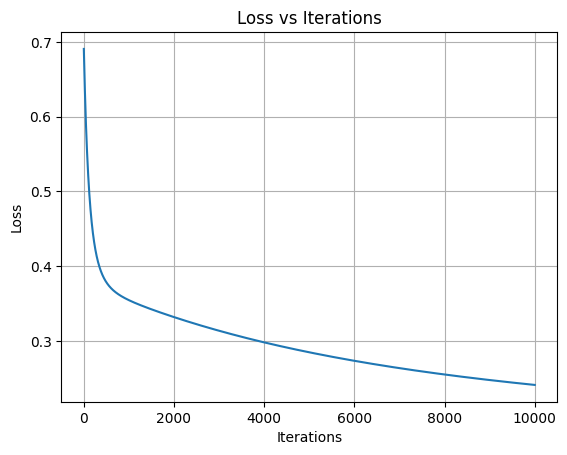

In [139]:
plt.plot(iter, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.grid(True)
plt.show()

In [140]:
prediction = classifier.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(f"accuracy on test sample: {accuracy*100:.2f}%")

accuracy on test sample: 91.93%


In [141]:
def text_vector(w2v_model, message):
    tokens = word_tokenize(message)
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]
    token_vectors = [w2v_model[word] for word in tokens if word in w2v_model]
    if token_vectors:
        return np.mean(token_vectors, axis = 0)
    else:
        return np.zeros(300)

def predict_message_class(classifier, w2v_model, message):
    
    vector = text_vector(w2v_model, message).reshape(1, -1)
    prediction = classifier.predict(vector)[0]
    return 'spam' if prediction == 1 else 'ham'

In [148]:
message = "Congratulations! You've won a free prize. Click here to claim."
print(predict_message_class(classifier, model, message))

message = "Hey, are we still on for the meeting tomorrow at 10 AM?"
print(predict_message_class(classifier, model, message))

message = "Get a new credit card with 0% interest for 12 months. Apply now!"
print(predict_message_class(classifier, model, message))


spam
ham
spam


## Comparing to sklearn's Logistic Regression model

In [143]:
# Filter out any rows where vector is None or not shape (300,)
df = df[df["vector"].apply(lambda x: isinstance(x, np.ndarray) and x.shape == (300,))]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

X1 = np.stack(df["vector"].values)
y1 = df["label"]

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train model
model2 = LogisticRegression(random_state=42, max_iter=1000)
model2.fit(X_train1, y_train1)

LogisticRegression(max_iter=1000, random_state=42)

In [144]:
predict = model2.predict(X_test1)

In [145]:
accuracy = accuracy_score(y_test1, predict)
print(f"accuracy on test sample: {accuracy*100:.2f}%")

accuracy on test sample: 100.00%
